# Vasiliki Kostara, Chapter 15: Ant Colony Optimization, Homework 4

# 15.1

''

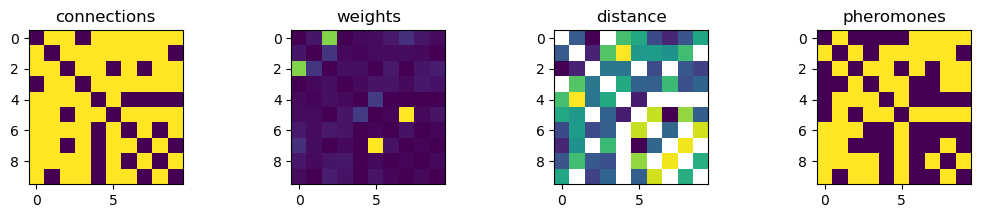

In [1]:
# 15.1. a), b), c), d)

import random
import numpy as np
import matplotlib.pyplot as plt

N = 10  # number of vertices

M = np.zeros([N, N])
D = np.zeros([N, N])
W = np.zeros([N, N])
T = np.ones([N, N])  # here I set τ_0 = 1 for simplicity

for i in range(N):
    for j in range(N):
        if i != j and np.random.random() < 0.5:
            M[i, j] = 1
            M[j, i] = 1
        
        if M[i, j] == 1:
            r = np.random.random()
            D[i, j] = r
            D[j, i] = r
            W[i, j] = 1 / D[i, j]
            W[j, i] = 1 / D[j, i]
        
        elif M[i, j] == 0:
            D[i, j] = 'inf'
            D[j, i] = 'inf'
            W[i, j] = 0
            W[j, i] = 0
            T[i, j] = 0            
            T[j, i] = 0
            
            

fig, axes = plt.subplots(1, 4, figsize=(13, 2))
im_connections = axes[0].imshow(M)
im_weights = axes[1].imshow(W)
im_distance = axes[2].imshow(D)
im_pheromones = axes[3].imshow(T)

axes[0].set_title('connections')
axes[1].set_title('weights')
axes[2].set_title('distance')
axes[3].set_title('pheromones')
;


In [2]:
# 15.1. e), f), g)

n_ants = 20
n_steps = n_ants-1

def generate_path(vertex, M, n_steps, N):
    path = []
    path.append(vertex)
    
    for t in range(n_steps - 1):
        next_possible_vertex = []
        for i in range(N):
            if M[i, vertex] == 1:
                next_possible_vertex.append(i)

        next_vertex = np.random.choice(next_possible_vertex)
        path.append(next_vertex)
        vertex = next_vertex

    return path

def total_distance(path, D):
    length = 0
    for i in range(len(path)-1):
        length += D[path[i+1], path[i]]
    
    return length

def simplify_sequence(path):
    simplified = []
    i = 0
    while i < len(path):
        if path[i] in path[i+1:]:
            i = path.index(path[i], i+1)
        else:
            simplified.append(path[i])
            i += 1
    
    return simplified
            

vertex = np.random.randint(N)
path = generate_path(vertex, M, n_steps, N)
length = total_distance(path, D)
simplified_path = simplify_sequence(path)
simplified_length = total_distance(simplified_path, D)

print('The generated path is ', path, '\n with total length = ', length, '.')
print('The simplified path is ', simplified_path, '\n with total length = ', simplified_length, '.')


The generated path is  [5, 8, 5, 0, 8, 7, 3, 9, 8, 5, 4, 1, 2, 3, 1, 6, 3, 4, 5] 
 with total length =  9.553913048540661 .
The simplified path is  [5] 
 with total length =  0 .


# 15.7

In [3]:
import numpy as np
from scipy.spatial import Delaunay
import matplotlib.pyplot as plt


def total_distance(sequence,D):
    return sum(D[sequence[i], sequence[i+1]] for i in range(len(sequence)-1))

def simplify_sequence(sequence):
    result = []
    i = 0
    while i < len(sequence):
        if sequence[i] in sequence[i+1:]:         
            i = sequence.index(sequence[i], i+1)  
        else:
            result.append(sequence[i])  
            i += 1
    return result
            

def branch_decision(i,T,D,M,alpha,beta):
    possible_next = np.where(M[i] == 1)[0]        
    probability_next = np.zeros(len(possible_next))      
    for j in range(len(possible_next)):
        probability_next[j] = T[i,possible_next[j]]**alpha * (1/D[i,possible_next[j]])**beta   
    probability_next = probability_next / sum(probability_next)   
    return np.random.choice(possible_next, p=probability_next)

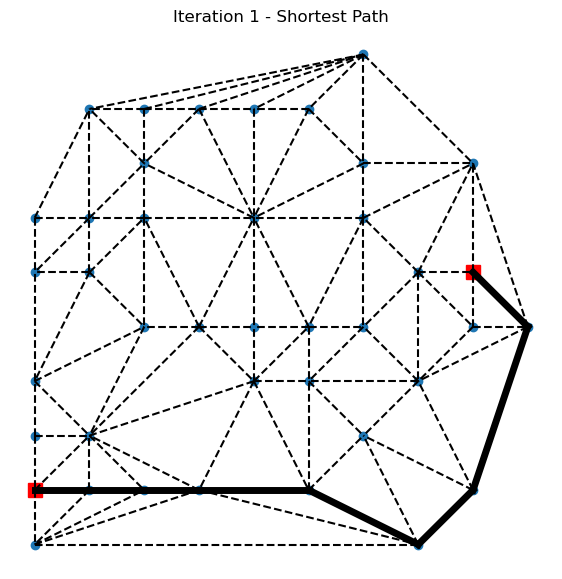

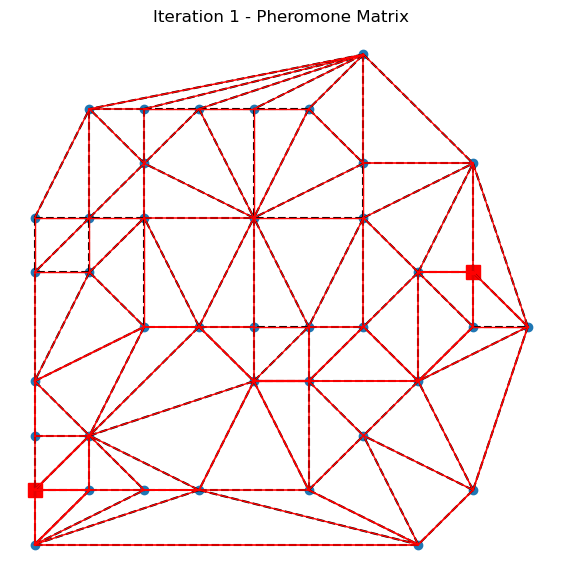

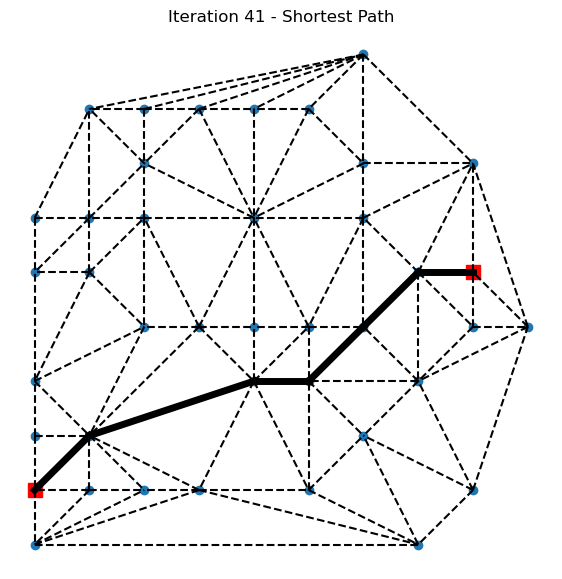

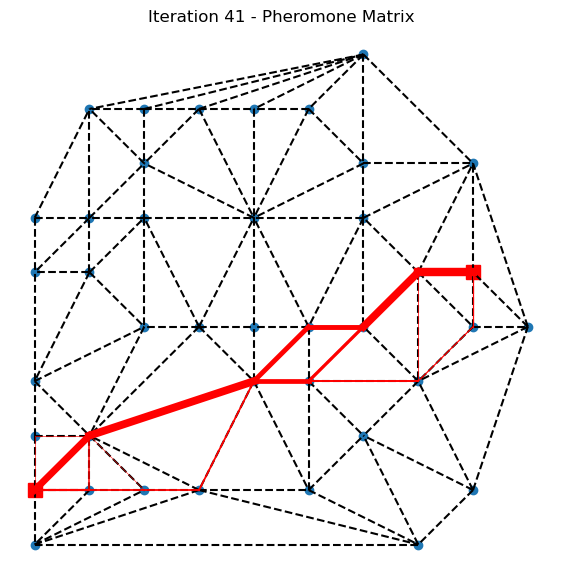

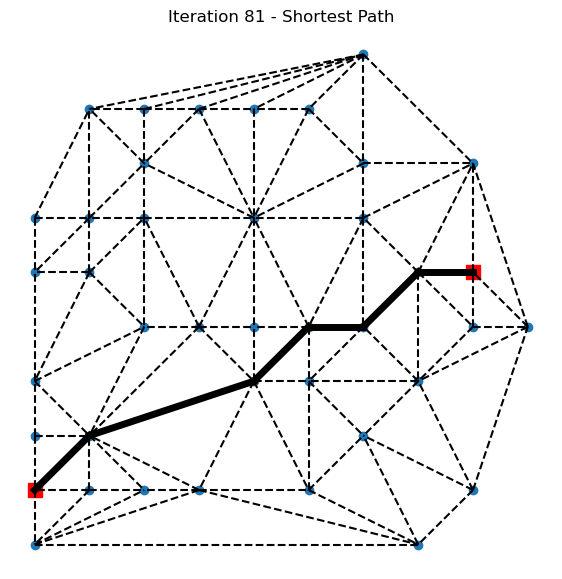

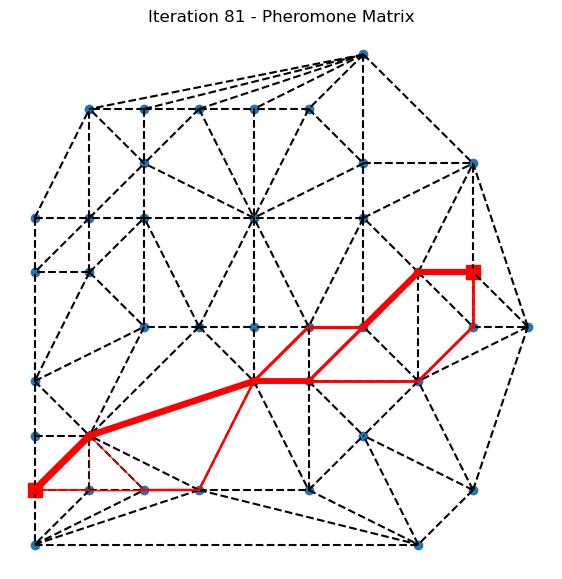

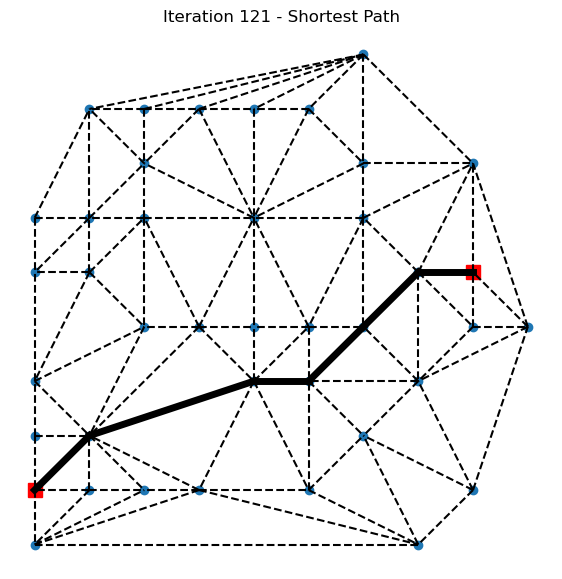

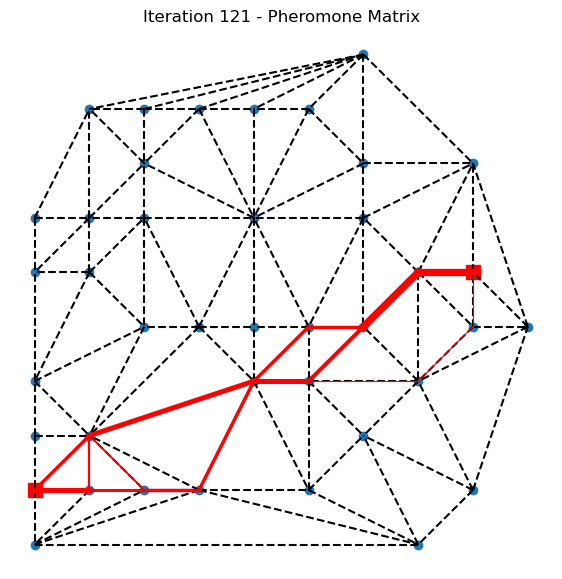

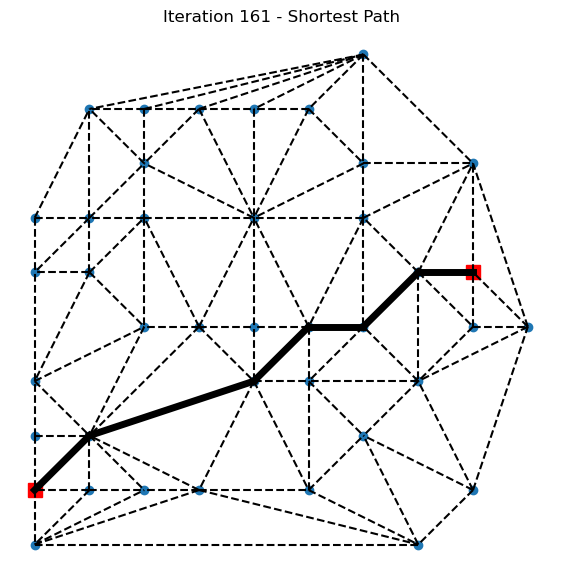

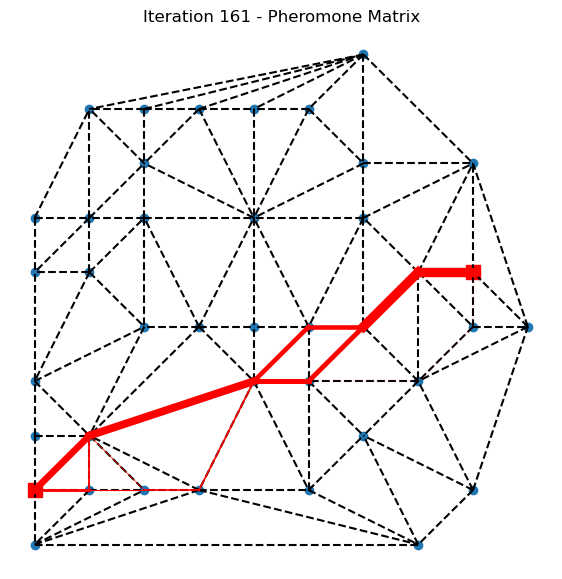

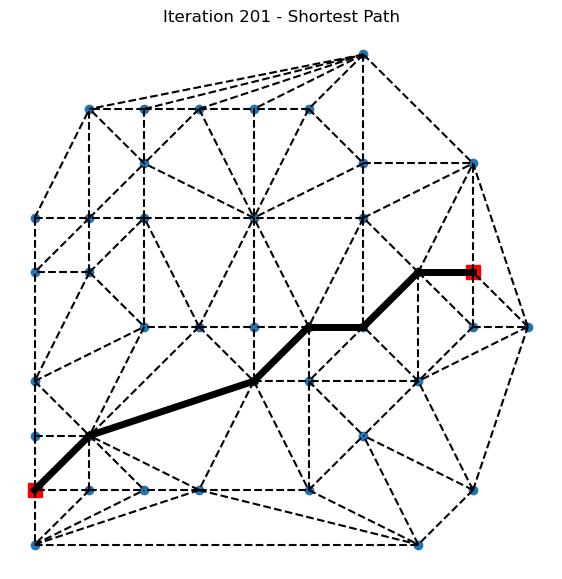

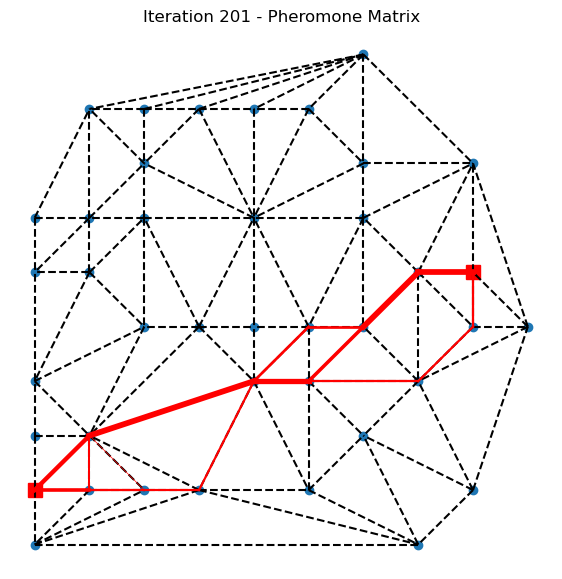

Text(0, 0.5, 'Shortest Path Distance')

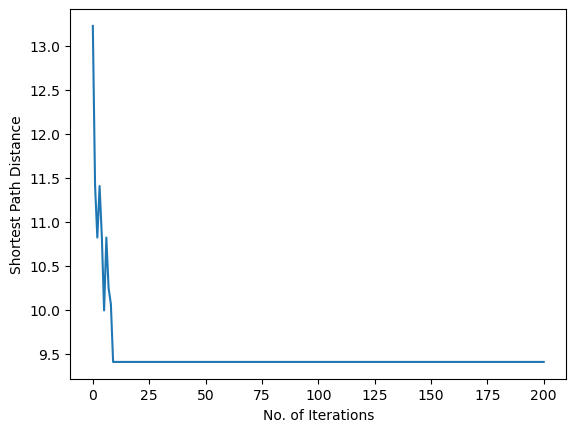

In [4]:
n = 20             # number of ants
alpha = 0.8        # α 
beta = 1           # β 
rho = 0.5          # ρ, evaporation rate
max_steps = 80                       # number of steps
number_of_iterations = 201           # number of iterations
N = 40                               # number of nodes(vertices)

all_points = []    # generate 10  points, 10x10 = 100 vertices < N
for i in range(10):
    for j in range(10):
        all_points.append([i,j])

# pick N random unique points from all_points
indices = np.random.choice(len(all_points), N, replace=False)
r = np.array([all_points[i] for i in indices])


# make a lattice of the generated points according to Delaunay triangulation
tri = Delaunay(r)

# connection matrix
M = np.zeros((N, N))
for simplex in tri.simplices:
    for i in range(len(simplex)):
        for j in range(i+1, len(simplex)):   # wherever Delaunay triangulation occurs, nodes connect
            M[simplex[i], simplex[j]] = 1
            M[simplex[j], simplex[i]] = 1
    

# distance matrix, Euclidean distance of points in r 
D = np.zeros((N, N))
for i in range(N):
    for j in range(i+1,N):
        D[i,j] = np.linalg.norm(r[i]-r[j])
        D[j,i] = D[i,j]

for i in range(N):
    for j in range(i+1,N):
        if M[i,j] == 0:
            D[i,j] = np.inf
            D[j,i] = np.inf


distance_bird = 0 
while distance_bird < 7:        # we don't want the starting and the target node to be too close
    s = np.random.randint(0, N) # starting node
    t = np.random.randint(0, N) # ending node
    distance_bird = np.sqrt((r[t,0] - r[s,0])**2 + (r[t,1] - r[s,1])**2)  # Eucledian distance of starting, ending


T = M                         # initialize the pheromone matrix as equal to the connection matrix
shortestDistance = []
shortestPath = []
for iteration in range(number_of_iterations):      
    T = T*(1-rho)
    paths = []                # initialize the paths of the ants
    for i in range(n):        # iterate for each ant
        paths.append([s])     # all ants have the same starting point
        for step in range(max_steps):
            next_node = branch_decision(paths[i][-1], T, D, M, alpha, beta)  # select next node according to the...
            paths[i].append(next_node)                                       # ...probability function
            if next_node == t:          
                break                   # end with the ending node, same for each ant
                
    shortestDist = np.inf       # set the shortest distance as the simplified distance & make it non-infinite
    for i in range(n):        # iterate for each ant
        if t in paths[i]:               # simplify the path and calculate its distance
            paths[i] = simplify_sequence(paths[i])
            path_distance = total_distance(paths[i],D)
            
            if path_distance < shortestDist:
                shortestDist = path_distance
                shortPath = paths[i]
                
            for j in range(len(paths[i])-1):                # update pheromone levels on each edge(connection)
                T[paths[i][j],paths[i][j+1]] += 1/path_distance
                T[paths[i][j+1],paths[i][j]] += 1/path_distance
    
    shortestDistance.append(shortestDist)
    shortestPath.append(shortPath)    
    
    if iteration % 40 == 0:       # show the plots after +40 iterations
        
    # plot the lattice and the shortest path
        plt.figure(figsize=(7,7))
        plt.plot(r[:,0], r[:,1], 'o')
        plt.plot(r[s,0], r[s,1], 's', color='red', markersize=10)
        plt.plot(r[t,0], r[t,1], 's', color='red', markersize=10)
        for i in range(N):
            for j in range(i+1,N):
                if M[i,j] == 1:
                    plt.plot([r[i,0], r[j,0]], [r[i,1], r[j,1]],'k--')  # plot the whole lattice with dashed line
        
        p = shortestPath[iteration]  
        for q in range(len(p)-1):       # plot the shortest path so far with black line
            i = p[q]
            j = p[q+1]
            plt.plot([r[i,0], r[j,0]], [r[i,1], r[j,1]],'black',linewidth=5) 

        plt.title('Iteration ' + str(iteration+1)+' - Shortest Path')
        plt.axis('off')
        plt.show()
        
    # plot the lattice and the pheromone levels along the traversed paths
        plt.figure(figsize=(7,7))
        plt.plot(r[:,0], r[:,1], 'o')  
        plt.plot(r[s,0], r[s,1], 's', color='red', markersize=10)
        plt.plot(r[t,0], r[t,1], 's', color='red', markersize=10)
        
        for i in range(N):
            for j in range(i+1,N):
                if M[i,j] == 1:
                    plt.plot([r[i,0], r[j,0]], [r[i,1], r[j,1]],'k--') # plot the whole lattice with dashed line again

        for i in range(N):             # plot the phelomone levels with respective proportional linewidth in red
            for j in range(i+1,N):
                plt.plot([r[i,0], r[j,0]], [r[i,1], r[j,1]],'r',linewidth=T[i,j]*2)
        plt.title('Iteration ' + str(iteration+1) + ' - Pheromone Matrix')
        plt.axis('off')
        plt.show()
    
plt.plot(np.linspace(0,number_of_iterations-1,number_of_iterations),shortestDistance)
plt.xlabel("No. of Iterations")
plt.ylabel("Shortest Path Distance")


# Exercise 15.8

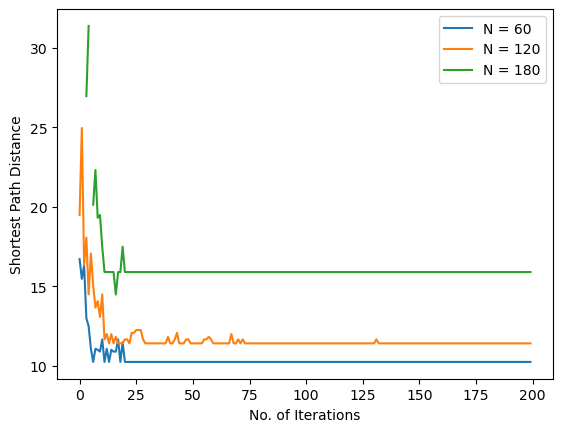

In [5]:
n = 20           
alpha = 0.8      
beta = 1         
rho = 0.5        
max_steps = 80   
number_of_iterations = 200 

Nodes = [60,120,180]                 # different numbers of nodes

all_points = []            
for i in range(15):
    for j in range(15):
        all_points.append([i,j])
        
for N in Nodes:                     # same procedure for each node number
    indices = np.random.choice(len(all_points), N, replace=False)
    r = np.array([all_points[i] for i in indices])
    tri = Delaunay(r)
    
    # connection matrix
    M = np.zeros((N, N))
    for simplex in tri.simplices:
        for i in range(len(simplex)):
            for j in range(i+1, len(simplex)):
                M[simplex[i], simplex[j]] = 1
                M[simplex[j], simplex[i]] = 1

    # distance matrix
    D = np.zeros((N, N))
    for i in range(N):
        for j in range(i+1,N):
            D[i,j] = np.linalg.norm(r[i]-r[j])
            D[j,i] = D[i,j]

    for i in range(N):
        for j in range(i+1,N):
            if M[i,j] == 0:
                D[i,j] = np.inf
                D[j,i] = np.inf

    distance_bird = 0 
    while distance_bird < 7:             
        s = np.random.randint(0, N)
        t = np.random.randint(0, N)
        distance_bird = np.sqrt((r[t,0] - r[s,0])**2 + (r[t,1] - r[s,1])**2)
        
    T = M                  
    shortestDistance = []
    shortestPath = []
    for iteration in range(number_of_iterations):
        T = T*(1-rho)
        paths = []
        for i in range(n):
            paths.append([s])
            for step in range(max_steps):
                next_node = branch_decision(paths[i][-1], T, D, M, alpha, beta)
                paths[i].append(next_node)
                if next_node == t:
                    break

        shortestDist = np.inf
        for i in range(n):
            if t in paths[i]:
                paths[i] = simplify_sequence(paths[i])
                path_distance = total_distance(paths[i],D)
                if path_distance<shortestDist:
                    shortestDist = path_distance
                    shortPath = paths[i]
                for j in range(len(paths[i])-1):
                    T[paths[i][j],paths[i][j+1]] += 1/path_distance
                    T[paths[i][j+1],paths[i][j]] += 1/path_distance

        shortestDistance.append(shortestDist)
        shortestPath.append(shortPath)    


    plt.plot(np.linspace(0,number_of_iterations-1,number_of_iterations),shortestDistance,label = 'N = ' +str(N))
    plt.xlabel("No. of Iterations")
    plt.ylabel("Shortest Path Distance")
    plt.legend(loc="upper right")
    

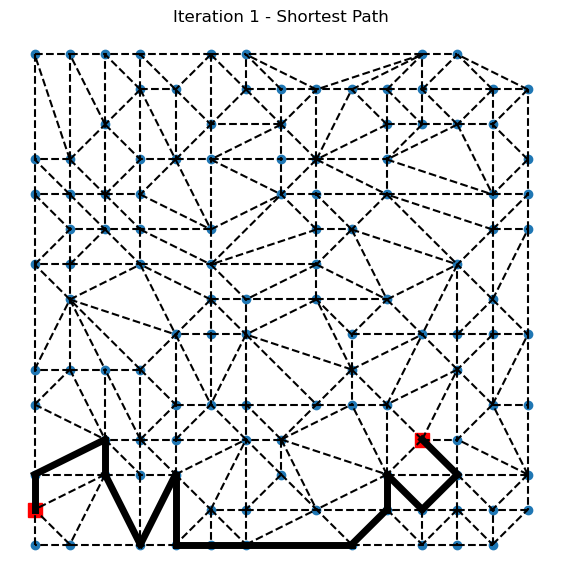

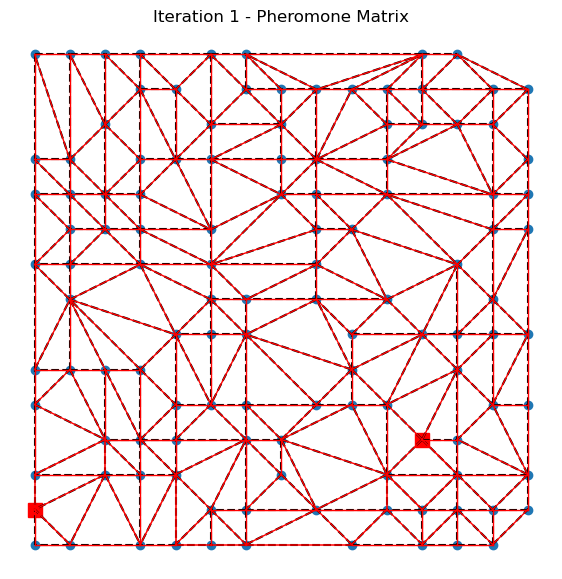

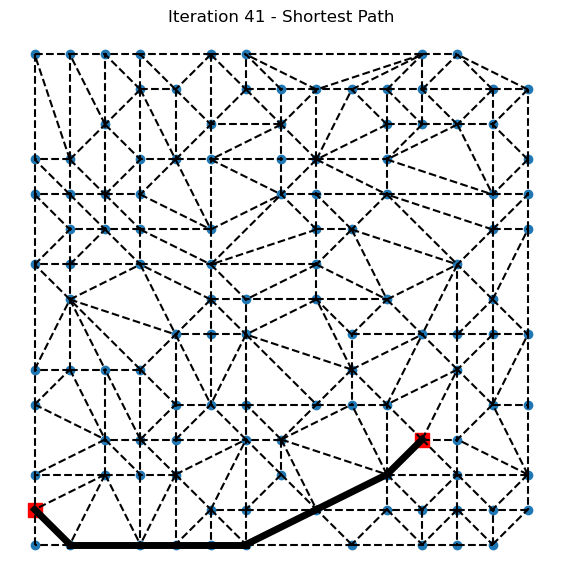

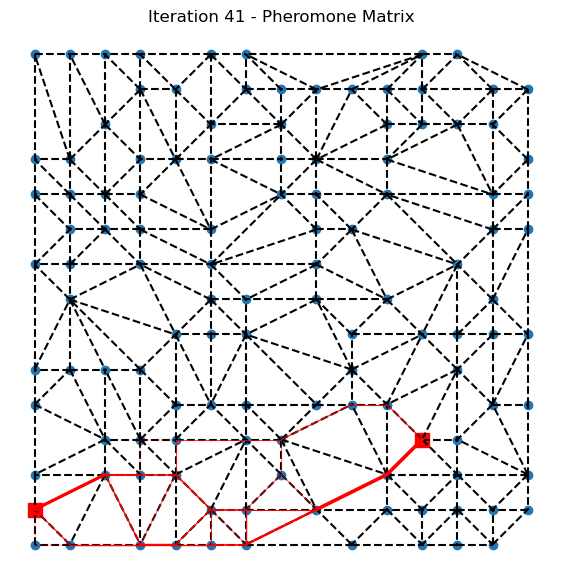

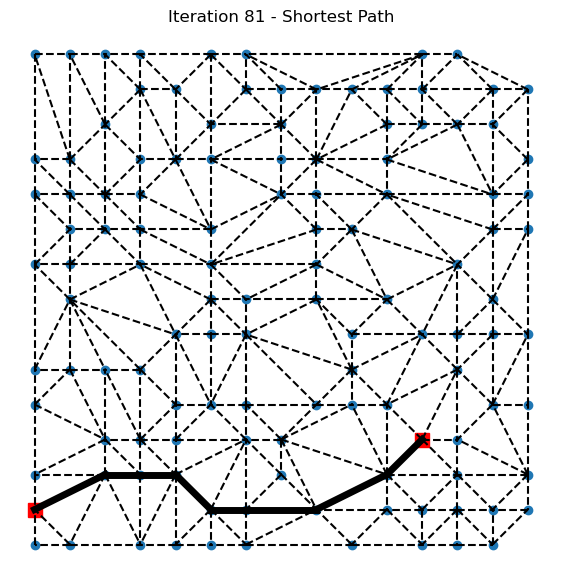

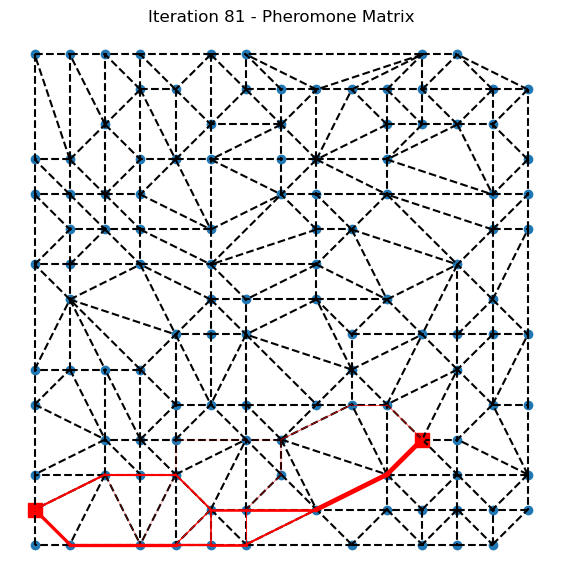

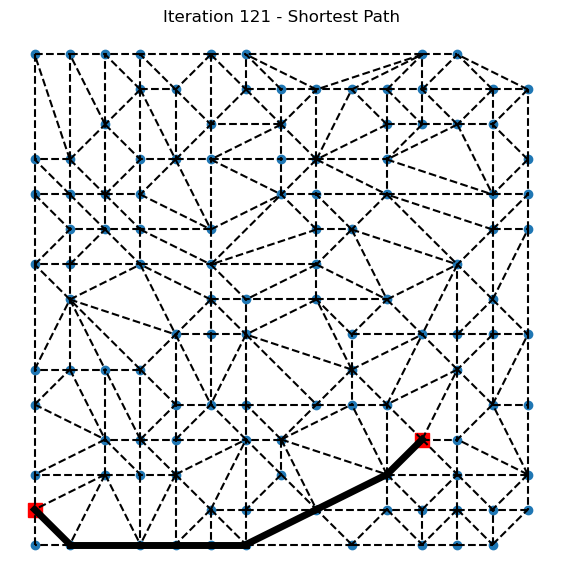

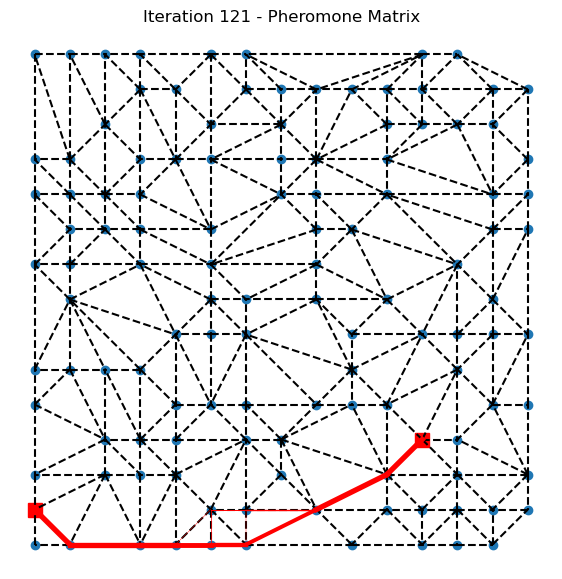

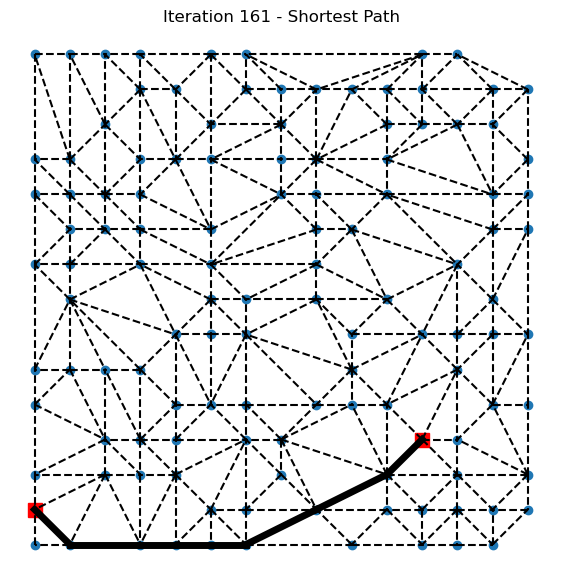

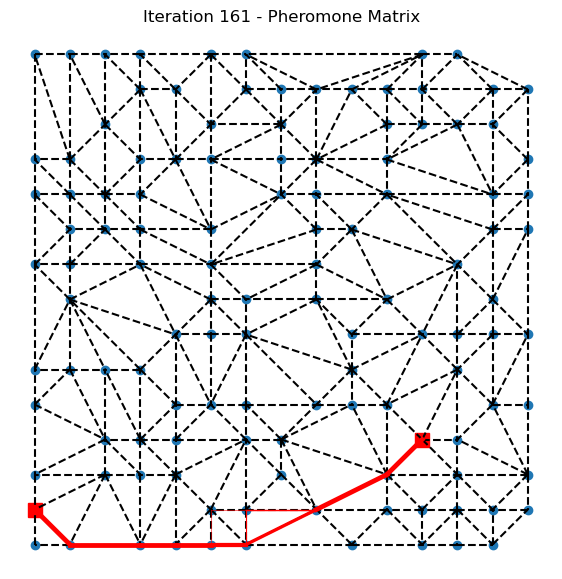

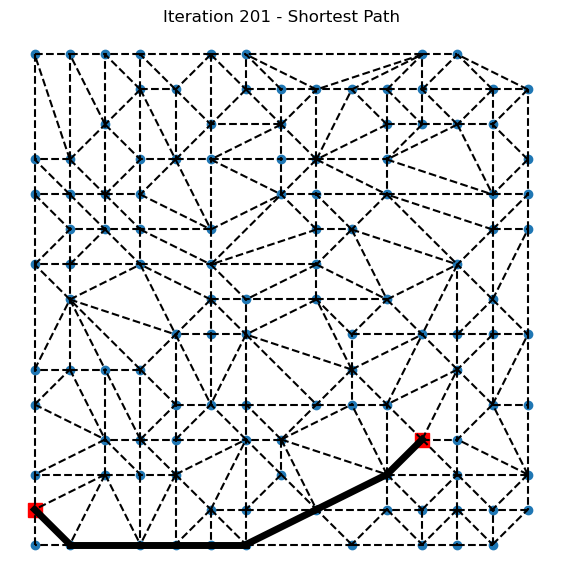

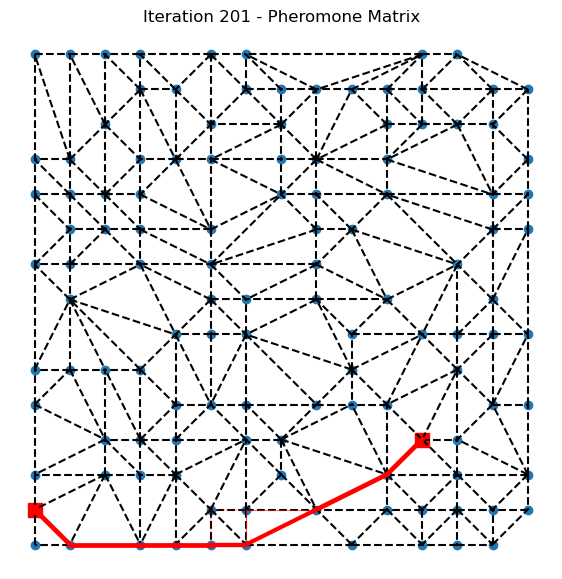

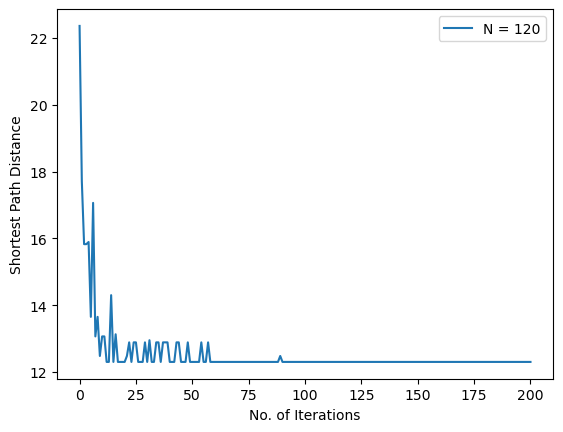

In [6]:
n = 20            
alpha = 0.8      
beta = 1   
rho = 0.5        
max_steps = 80   
number_of_iterations = 201

N = 120  

all_points = []     
for i in range(15):
    for j in range(15):
        all_points.append([i,j])

indices = np.random.choice(len(all_points), N, replace=False)
r = np.array([all_points[i] for i in indices])


tri = Delaunay(r)

M = np.zeros((N, N))
for simplex in tri.simplices:
    for i in range(len(simplex)):
        for j in range(i+1, len(simplex)):
            M[simplex[i], simplex[j]] = 1
            M[simplex[j], simplex[i]] = 1

D = np.zeros((N, N))
for i in range(N):
    for j in range(i+1,N):
        D[i,j] = np.linalg.norm(r[i]-r[j])
        D[j,i] = D[i,j]

for i in range(N):
    for j in range(i+1,N):
        if M[i,j] == 0:
            D[i,j] = np.inf
            D[j,i] = np.inf

distance_bird = 0 
while distance_bird < 7:   
    s = np.random.randint(0, N)
    t = np.random.randint(0, N)
    distance_bird = np.sqrt((r[t,0] - r[s,0])**2 + (r[t,1] - r[s,1])**2)

T = M
shortestDistance = []
shortestPath = []
for iteration in range(number_of_iterations):
    T = T*(1-rho)
    paths = []
    for i in range(n):
        paths.append([s])
        for step in range(max_steps):
            next_node = branch_decision(paths[i][-1], T, D, M, alpha, beta)
            paths[i].append(next_node)
            if next_node == t:
                break

    shortestDist = np.inf
    for i in range(n):
        if t in paths[i]:
            paths[i] = simplify_sequence(paths[i])
            path_distance = total_distance(paths[i],D)
            if path_distance<shortestDist:
                shortestDist = path_distance
                shortPath = paths[i]
            for j in range(len(paths[i])-1):
                T[paths[i][j],paths[i][j+1]] += 1/path_distance
                T[paths[i][j+1],paths[i][j]] += 1/path_distance

    shortestDistance.append(shortestDist)
    shortestPath.append(shortPath)    

    if iteration % 40 == 0:
        plt.figure(figsize=(7,7))
        plt.plot(r[:,0], r[:,1], 'o')
        plt.plot(r[s,0], r[s,1], 's', color='red', markersize=10)
        plt.plot(r[t,0], r[t,1], 's', color='red', markersize=10)
        for i in range(N):
            for j in range(i+1,N):
                if M[i,j] == 1:
                    plt.plot([r[i,0], r[j,0]], [r[i,1], r[j,1]],'k--')

        p = shortestPath[iteration]
        for q in range(len(p)-1):
            i = p[q]
            j = p[q+1]
            plt.plot([r[i,0], r[j,0]], [r[i,1], r[j,1]],'black',linewidth=5)

        plt.title('Iteration ' + str(iteration+1)+' - Shortest Path')
        plt.axis('off')
        plt.show()

        plt.figure(figsize=(7,7))
        plt.plot(r[:,0], r[:,1], 'o')
        plt.plot(r[s,0], r[s,1], 's', color='red', markersize=10)
        plt.plot(r[t,0], r[t,1], 's', color='red', markersize=10)
        for i in range(N):
            for j in range(i+1,N):
                if M[i,j] == 1:
                    plt.plot([r[i,0], r[j,0]], [r[i,1], r[j,1]],'k--')

        for i in range(N):
            for j in range(i+1,N):
                plt.plot([r[i,0], r[j,0]], [r[i,1], r[j,1]],'r',linewidth=T[i,j]*2)
        plt.title('Iteration ' + str(iteration+1) + ' - Pheromone Matrix')
        plt.axis('off')
        plt.show()

plt.plot(np.linspace(0,number_of_iterations-1,number_of_iterations),shortestDistance,label = 'N = ' +str(N))
plt.xlabel("No. of Iterations")
plt.ylabel("Shortest Path Distance")
plt.legend(loc="upper right")


# Exercise 15.9

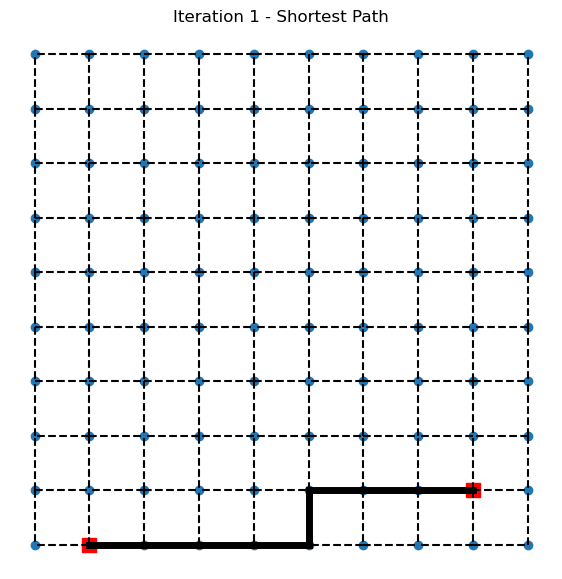

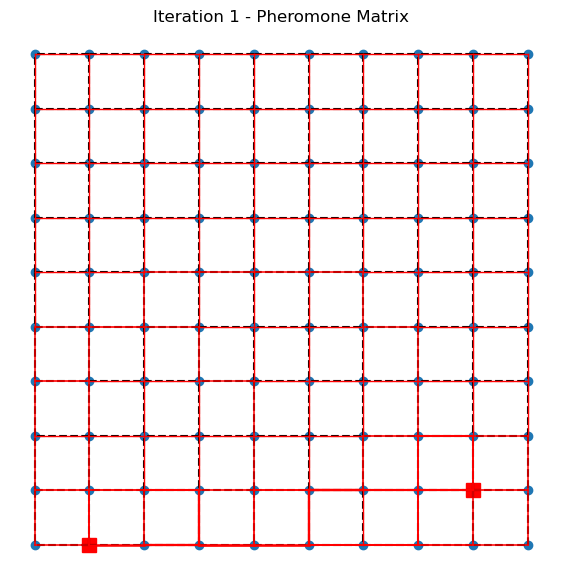

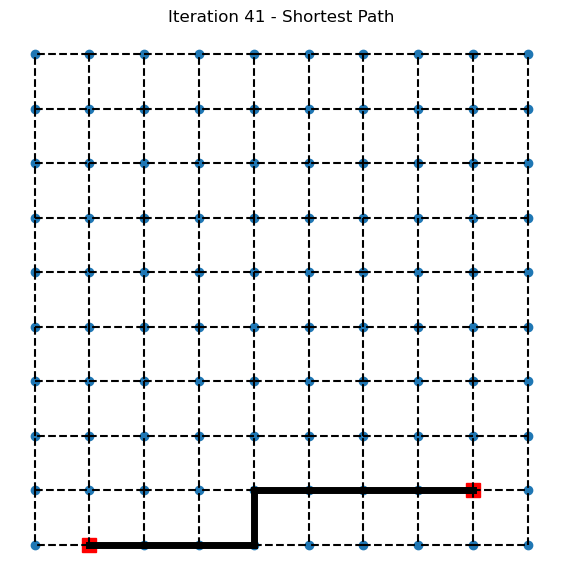

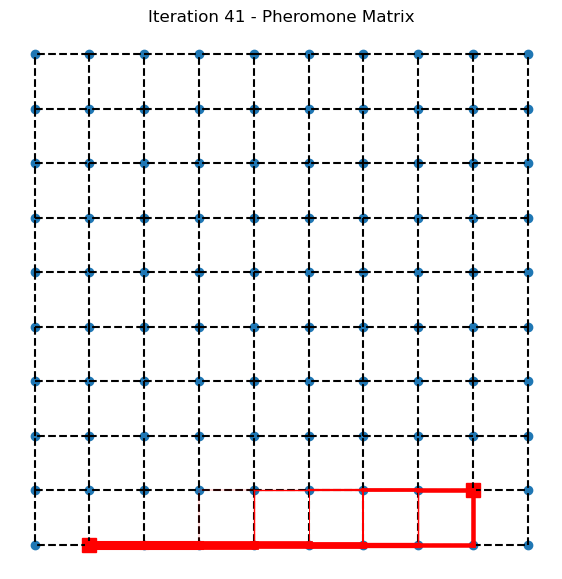

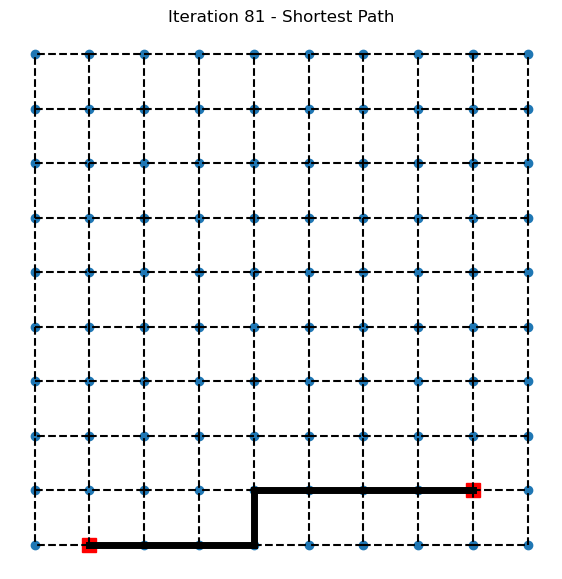

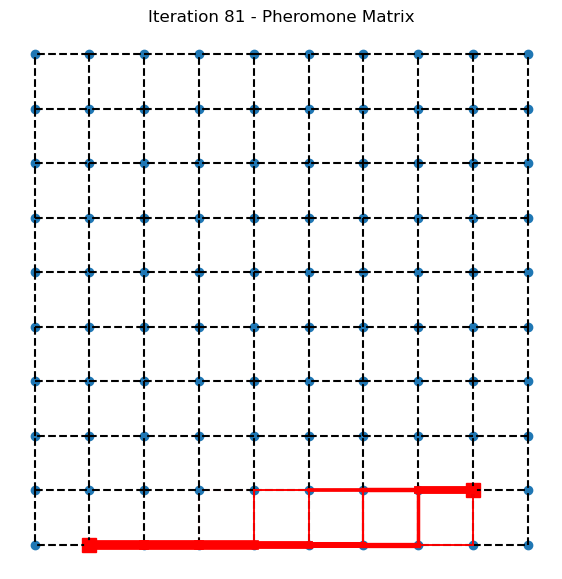

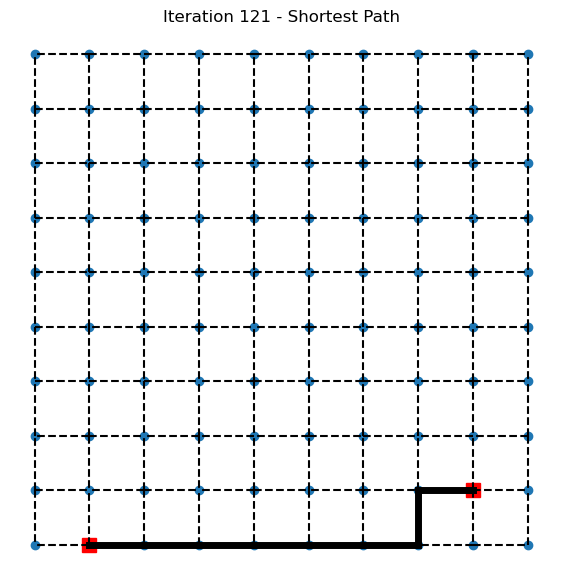

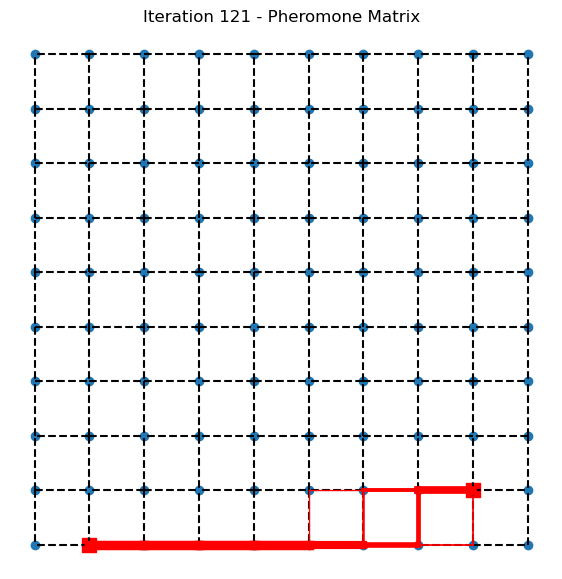

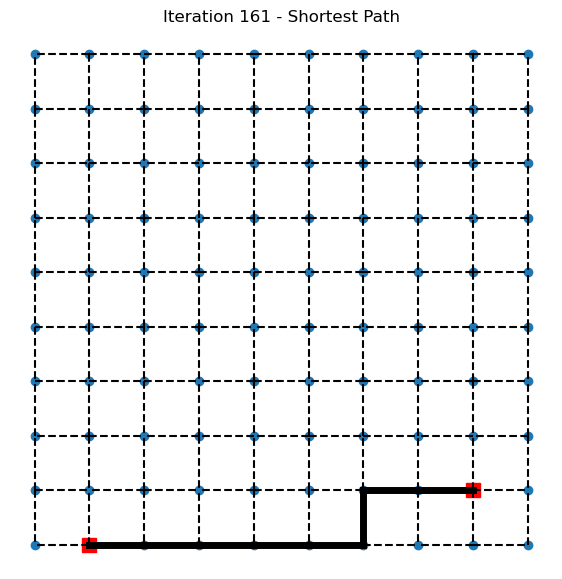

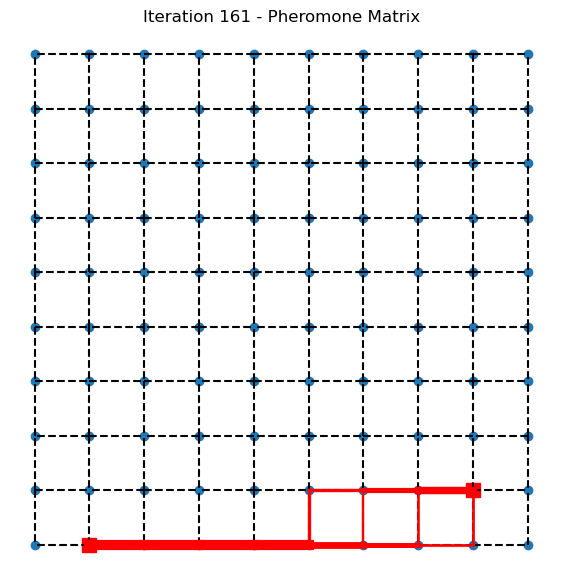

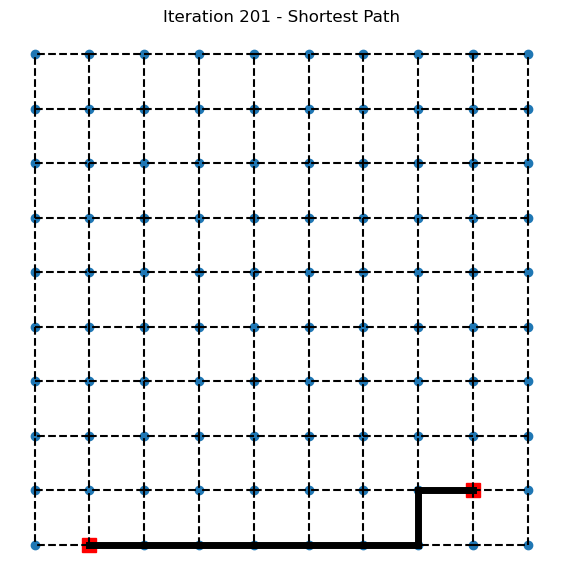

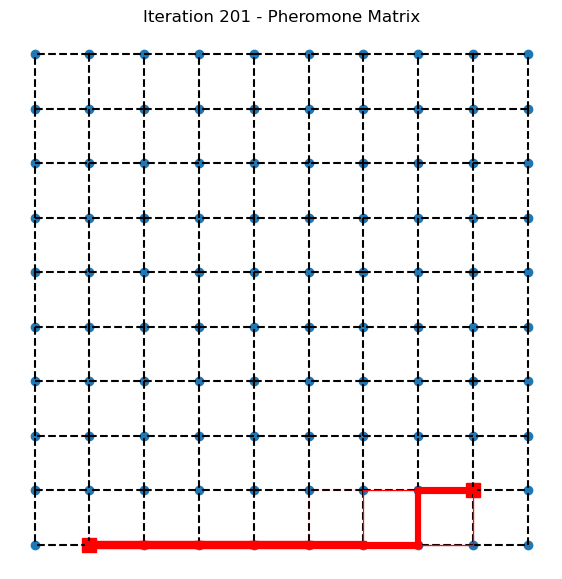

Text(0, 0.5, 'Shortest Path Distance')

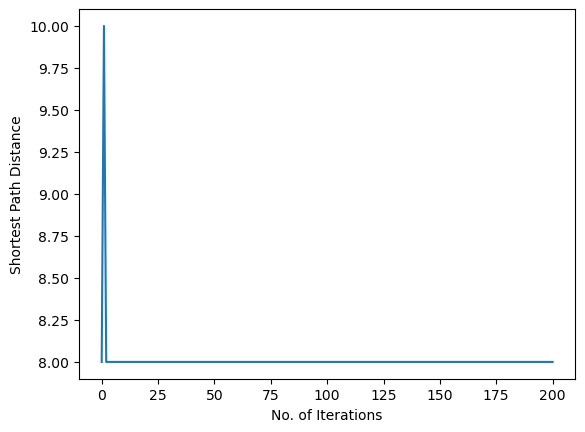

In [7]:
from scipy.spatial import Voronoi
import random

n = 20           
alpha = 0.8   
beta = 1   
rho = 0.5       
max_steps = 80   
number_of_iterations = 201

N = 100 

all_points = []      
for i in range(10):
    for j in range(10):
        all_points.append([i,j])

indices = np.random.choice(len(all_points), N, replace=False)
r = np.array([all_points[i] for i in indices])

tri = Voronoi(r) 

M = np.zeros((N, N))
for simplex in tri.ridge_points:
    for i in range(len(simplex)):
        for j in range(i+1, len(simplex)):
            M[simplex[i], simplex[j]] = 1
            M[simplex[j], simplex[i]] = 1

# after creating the connecctions, slightly distort the positions of the nodes randomly
#r = r + np.random.uniform(-0.2,0.2,[N,2])

D = np.zeros((N, N))
for i in range(N):
    for j in range(i+1,N):
        D[i,j] = np.linalg.norm(r[i]-r[j])
        D[j,i] = D[i,j]

for i in range(N):
    for j in range(i+1,N):
        if M[i,j] == 0:
            D[i,j] = np.inf
            D[j,i] = np.inf

distance_bird = 0 
while distance_bird < 7:  
    s = np.random.randint(0, N)
    t = np.random.randint(0, N)
    distance_bird = np.sqrt((r[t,0] - r[s,0])**2 + (r[t,1] - r[s,1])**2)

T = M  
shortestDistance = []
shortestPath = []
for iteration in range(number_of_iterations):
    T = T*(1-rho)
    paths = []
    for i in range(n):
        paths.append([s])
        for step in range(max_steps):
            next_node = branch_decision(paths[i][-1], T, D, M, alpha, beta)
            paths[i].append(next_node)
            if next_node == t:
                break
    
    shortestDist = np.inf
    for i in range(n):
        if t in paths[i]:
            paths[i] = simplify_sequence(paths[i])
            path_distance = total_distance(paths[i],D)
            if path_distance<shortestDist:
                shortestDist = path_distance
                shortPath = paths[i]
            for j in range(len(paths[i])-1):
                T[paths[i][j],paths[i][j+1]] += 1/path_distance
                T[paths[i][j+1],paths[i][j]] += 1/path_distance
    
    shortestDistance.append(shortestDist)
    shortestPath.append(shortPath)    
    
    if iteration % 40 == 0:
        plt.figure(figsize=(7,7))
        plt.plot(r[:,0], r[:,1], 'o')
        plt.plot(r[s,0], r[s,1], 's', color='red', markersize=10)
        plt.plot(r[t,0], r[t,1], 's', color='red', markersize=10)
        for i in range(N):
            for j in range(i+1,N):
                if M[i,j] == 1:
                    plt.plot([r[i,0], r[j,0]], [r[i,1], r[j,1]],'k--')
        
        p = shortestPath[iteration]
        for q in range(len(p)-1):
            i = p[q]
            j = p[q+1]
            plt.plot([r[i,0], r[j,0]], [r[i,1], r[j,1]],'black',linewidth=5)

        plt.title('Iteration ' + str(iteration+1)+' - Shortest Path')
        plt.axis('off')
        plt.show()
        
        plt.figure(figsize=(7,7))
        plt.plot(r[:,0], r[:,1], 'o')
        plt.plot(r[s,0], r[s,1], 's', color='red', markersize=10)
        plt.plot(r[t,0], r[t,1], 's', color='red', markersize=10)
        for i in range(N):
            for j in range(i+1,N):
                if M[i,j] == 1:
                    plt.plot([r[i,0], r[j,0]], [r[i,1], r[j,1]],'k--')

        for i in range(N):
            for j in range(i+1,N):
                plt.plot([r[i,0], r[j,0]], [r[i,1], r[j,1]],'r',linewidth=T[i,j]*2)
        plt.title('Iteration ' + str(iteration+1) + ' - Pheromone Matrix')
        plt.axis('off')
        plt.show()
    
plt.plot(np.linspace(0,number_of_iterations-1,number_of_iterations),shortestDistance)
plt.xlabel("No. of Iterations")
plt.ylabel("Shortest Path Distance")


In [8]:
!jupyter nbconvert --to webpdf --allow-chromium-download Ant_Colony_Optimization.ipynb

[NbConvertApp] Converting notebook Ant_Colony_Optimization.ipynb to webpdf
[NbConvertApp] Building PDF
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 2243797 bytes to Ant_Colony_Optimization.pdf
